zshで必要なモジュールをインストール
```zsh
% pip install numpy
% pip install scipy
% pip install matplotlib
```

In [145]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


# 離散型
from scipy.stats import binom   # 二項分布
from scipy.stats import poisson # ポアソン分布
from scipy.stats import geom    # 幾何分布
from scipy.stats import nbinom  # 負の二項分布（パスカル分布）


# fivethirtyeightスタイルを使う
mpl.style.use(style='fivethirtyeight')

# Jupyter Notebookに描画
%matplotlib inline

## 離散型確率分布（discrete distributions）

### 二項分布（binominal distribution）

- [scipy.stats.binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)

$n$ 回のベルヌーイ試行において、成功確率 $p$ の 事象 $X$ が $k$ 回起こる確率分布

$$
P(X=k)=_nC_kp^k(1-p)^{n-k}
$$

>ここにはテキストが入ります。ここにはテキストが入ります。

$X \sim B(n, p)$ のとき、
- 期待値　 : $E(X)=np$
- 標準偏差 : $\sigma(X)=\sqrt{np(1-p)}$

---

e.g. 

### ポアソン分布（poisson distribution）

- [scipy.stats.poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

ある期間に平均 $ \lambda $ 回起こる事象 $X$ が $ k $ 回起こる確率分布

$$
P(X=k)=\frac{e^{-\lambda}\lambda^k}{k!}
$$

>ベルヌーイ試行のうち $n$ が十分大きく、 確率 $p$ が非常に小さい時、事象 $X$ の期待値 $E(X)$ は『 $np = \lambda $（一定）』と考えることができる。このとき、事象 $X$ が発生する回数 $k$ は**ポアソン分布**に従う。つまり、ポアソン分布は『ある期間に平均 $\lambda$ 回発生する事象が、ある期間に $k$ 回発生する確率分布』と言い換えられる。

$X \sim Po(\lambda)$ のとき、
- 期待値　 : $E(X)=\lambda$
- 標準偏差 : $\sigma(X)=\sqrt{\lambda}$

---

e.g. 
- 1時間に平均5回アクセスされるサイトが10回アクセスされる確率
$$
P(X=10) = \frac{e^{-5}\times5^{10}}{10!} \fallingdotseq 0.018
$$


- 100個に1個の当たりのあるお菓子を10個買った時に、当たりのお菓子が2個含まれる場合の確率
$$
P(X=2) = \frac{e^{-0.1}\times{0.1}^2}{2!} \fallingdotseq 0.0045
$$

#### 確率質量関数（probability mass function, PMF）

e.g. 1か月に平均2回外食する人が4回外食する確率

In [78]:
mu = 2
k = 4
print(f'{poisson.pmf(k, mu):.2%}')

9.02%


#### パーセント点関数（percent point function, PPF）

e.g. 1か月に平均2回外食する人の母平均 $\mu$ の95%信頼区間を求める

In [73]:
mu = 2
print(f'{poisson.ppf(0.025, mu):.0f} <= μ <= {poisson.ppf(0.975 , mu):.0f}')

0 <= μ <= 5


#### 累積分布関数（cumulative density function, CDF）

e.g. 1か月に平均2回外食する人が0〜3回外食する確率

In [46]:
mu = 2
k = 3
print(f'{poisson.cdf(k, mu):.2%}')

85.71%


#### 生存関数（survival function, SF）

e.g. 1か月に平均2回外食する人が3回より多く外食する確率

In [61]:
mu = 2
k = 3
print(f'{poisson.sf(k, mu):.2%}')

14.29%


#### ポアソン分布（確率質量関数）の可視化

e.g. 1か月に平均2回外食する人のポアソン分布（母平均 $\mu$ の99%信頼区間）をプロットする

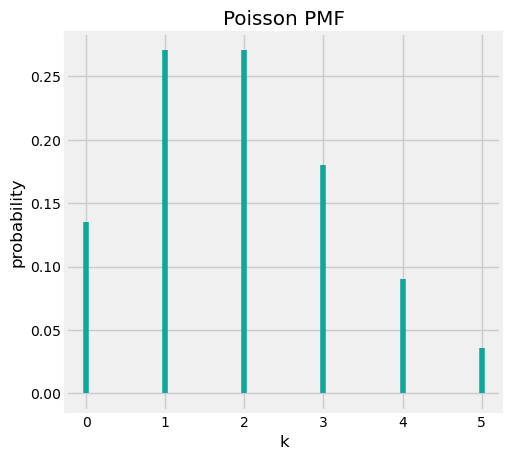

In [87]:
mu = 2
k = np.arange(poisson.ppf(0.005, mu), poisson.ppf(0.995, mu))

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.set(title='Poisson PMF', xlabel='k', ylabel='probability')
ax.vlines(k, 0, poisson.pmf(k, mu), colors='#0EA89B')

### 幾何分布（geometric distribution）

- [scipy.stats.geom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html)

成功確率 $p$ のベルヌーイ試行を繰り返す事象 $X$ が $n$ 回目に初めて成功する確率分布

$$
P(X=n)=(1-p)^{n-1}p
$$

$X \sim Geom(p)$ のとき、
- 期待値　 : $E(X)=\frac{1}{p}$
- 標準偏差 : $\sigma(X)=\sqrt{\frac{1-p}{p^2}}$

---

e.g. 
- 2人でじゃんけんをして勝つ確率は $\frac{1}{3}$ である。5回目で初めて勝つ確率は

$$
P(X=5) = (1-\frac{1}{3})^4 \times \frac{1}{3} \fallingdotseq 0.065
$$

- 1つの卵を割って2つ黄身が出る（二黄卵）の確率は $\frac{1}{100}$ である。10回目で初めて出る確率は

$$
P(X=10) = (1-\frac{1}{100})^9 \times \frac{1}{100} \fallingdotseq 0.0091
$$

#### 確率質量関数（probability mass function, PMF）

e.g. サイコロを投げて6が出る確率 $p$ は $\frac{1}{6}$ である。4投目で初めて6が出る確率は

In [111]:
p = 1/6
n = 4
print(f'{geom.pmf(n, p):.2%}')

9.65%


#### パーセント点関数（percent point function, PPF）

e.g. サイコロを投げて6が出る確率 $p$ は $\frac{1}{6}$ である。 初めて6が出る試行回数 $n$ の95%信頼区間を求める。

In [113]:
p = 1/6
print(f'{geom.ppf(0.025, p):.0f} <= n <= {geom.ppf(0.975 , p):.0f}')

1 <= n <= 21


#### 累積分布関数（cumulative density function, CDF）

e.g. サイコロを投げて6が出る確率 $p$ は $\frac{1}{6}$ である。4投目までに6が1回でも出る確率は

In [123]:
p = 1/6
n = 4
print(f'{geom.cdf(n, p):.2%}')

51.77%


#### 生存関数（survival function, SF）

e.g. サイコロを投げて6が出る確率 $p$ は $\frac{1}{6}$ である。4投目より多く投げたときに初めて6が出る確率は

In [124]:
p = 1/6
n = 4
print(f'{geom.sf(n, p):.2%}')

48.23%


#### 幾何分布（確率質量関数）の可視化

e.g. サイコロを投げて6が出る確率 $p$ は $\frac{1}{6}$ である。初めて6が出る試行回数 $n$ の99%信頼区間をプロットする

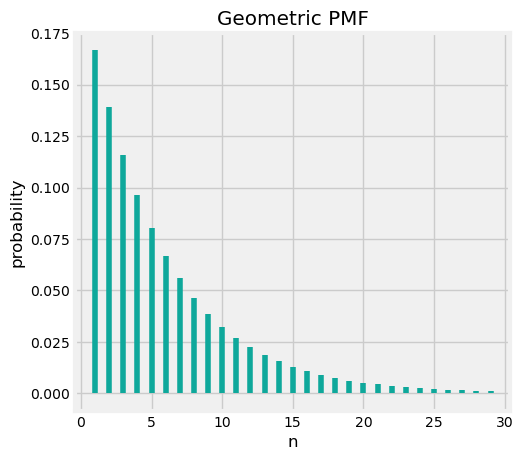

In [134]:
p = 1/6
n = np.arange(geom.ppf(0.005, p), geom.ppf(0.995, p))

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.set(title='Geometric PMF', xlabel='n', ylabel='probability')
ax.vlines(n, 0, geom.pmf(n, p), colors='#0EA89B')

### 負の二項分布（negative binomial distribution）

- [scipy.stats.nbinom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html)

$k+r$ 回のベルヌーイ試行において、成功確率 $p$ の事象 $X$ が $r$ 回成功するまでの失敗回数 $k$ の確率分布

$$
P(X=k)=_{r+k-1}C_kp^r(1-p)^k
$$

>成功回数 $r$ が1のとき、幾何分布となる。また、 $r$ が正の整数のときパスカル分布とも言う。

$X \sim NB(r, p)$ のとき、
- 期待値　 : $E(X)=\frac{r(1-p)}{p}$
- 標準偏差 : $\sigma(X)=\sqrt{\frac{r(1-p)}{p^2}}$

---

e.g. 
- サイコロを投げて6が出る確率 $p$ は $\frac{1}{6}$ である。6の目が3回出るまでに他の目が 5回出る確率は

$$
P(X=5)=_7C_5 \times (\frac{1}{6})^3 \times (1-\frac{1}{6})^5 \fallingdotseq 0.0391
$$

In [187]:
nbinom.pmf(5, 3, 1/6)

0.03907143061271148

#### 確率質量関数（probability mass function, PMF）

```python
nbinom(失敗回数k, 成功回数r, 成功確率p)
```

e.g. 日本人のAB型の割合は10％だと言われており、街で声を掛けてAB型の人を30人見つけたいとする。180人目に声を掛けて、ちょうど終わる確率は

In [200]:
n = 180
r = 30
k = n - r
p = 0.1

print(f'{nbinom.pmf(k, r, p):.2%}')

0.03%


#### パーセント点関数（percent point function, PPF）

e.g. 日本人のAB型の割合は10％だと言われており、街で声を掛けてAB型の人を30人見つけたいとする。失敗回数 $k$ の95%信頼区間を求める

In [201]:
r = 30
p = 0.1

print(f'{nbinom.ppf(0.025, r, p):.0f} <= k <= {nbinom.ppf(0.975, r, p):.0f}')
print(f'{nbinom.ppf(0.025, r, p) + r:.0f} <= n <= {nbinom.ppf(0.975, r, p) + r:.0f}')

177 <= k <= 381
207 <= n <= 411


#### 累積分布関数（cumulative density function, CDF）

e.g. 日本人のAB型の割合は10％だと言われており、街で声を掛けてAB型の人を30人見つけたいとする。180人目までに終わる確率は

In [202]:
n = 180
r = 30
k = n - r
p = 0.1

print(f'{nbinom.cdf(k, r, p):.2%}')

0.38%


#### 生存関数（survival function, SF）

e.g. 日本人のAB型の割合は10％だと言われており、街で声を掛けてB型の人を30人見つけたいとする。180人より多く声を掛けて終わる確率は

In [203]:
n = 180
r = 30
k = n - r
p = 0.1

print(f'{nbinom.sf(k, r, p):.2%}')

99.62%


#### 負の二項分布（確率質量関数）の可視化

e.g. 日本人のAB型の割合は10％だと言われており、街で声を掛けてB型の人を30人見つけたいとする。そのときの試行回数 $n$ の99%信頼区間を可視化する

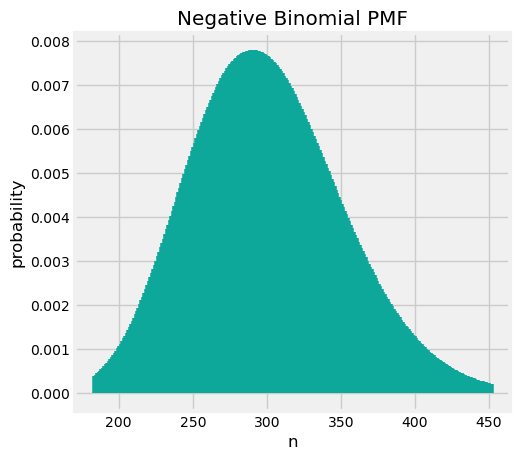

In [207]:
r = 30
k = np.arange(nbinom.ppf(0.005, r, p), nbinom.ppf(0.995, r, p))
p = 0.1

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.set(title='Negative Binomial PMF', xlabel='n', ylabel='probability')
ax.vlines(k + r, 0, nbinom.pmf(k, r, p), colors='#0EA89B')

In [208]:
arr = ['aiueo', 'kakikukeko', 'sashisuseso']

[len(i) for i in arr]

[5, 10, 11]

In [210]:
arr_cnt = []
for i in arr:
    arr_cnt.append(len(i))
    
arr_cnt

[5, 10, 11]